In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

In [2]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (12, 6)
rcParams["lines.linewidth"] = 3
rcParams["xtick.labelsize"] = "x-large"
rcParams["ytick.labelsize"] = "x-large"

## Exploratory Data Analysis

In [3]:
data1 = pd.read_csv("train.csv")
data1.shape

(891, 12)

In [4]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.000,B71,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.500,F33,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.000,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.200,B41,C


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(data1.duplicated().sum())

0


In [10]:
data1.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
target = "Survived"
id_col = "PassengerId"

cat = ["Name","Sex","Ticket","Cabin","Embarked"]
num = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]

In [12]:
data1[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
data1[num].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
for col in cat:
    print(f"value count column {col} :")
    print(data1[col].value_counts())
    print()

value count column Name :
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64

value count column Sex :
Sex
male      577
female    314
Name: count, dtype: int64

value count column Ticket :
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877 

## UNIVARIATE ANALYSIS

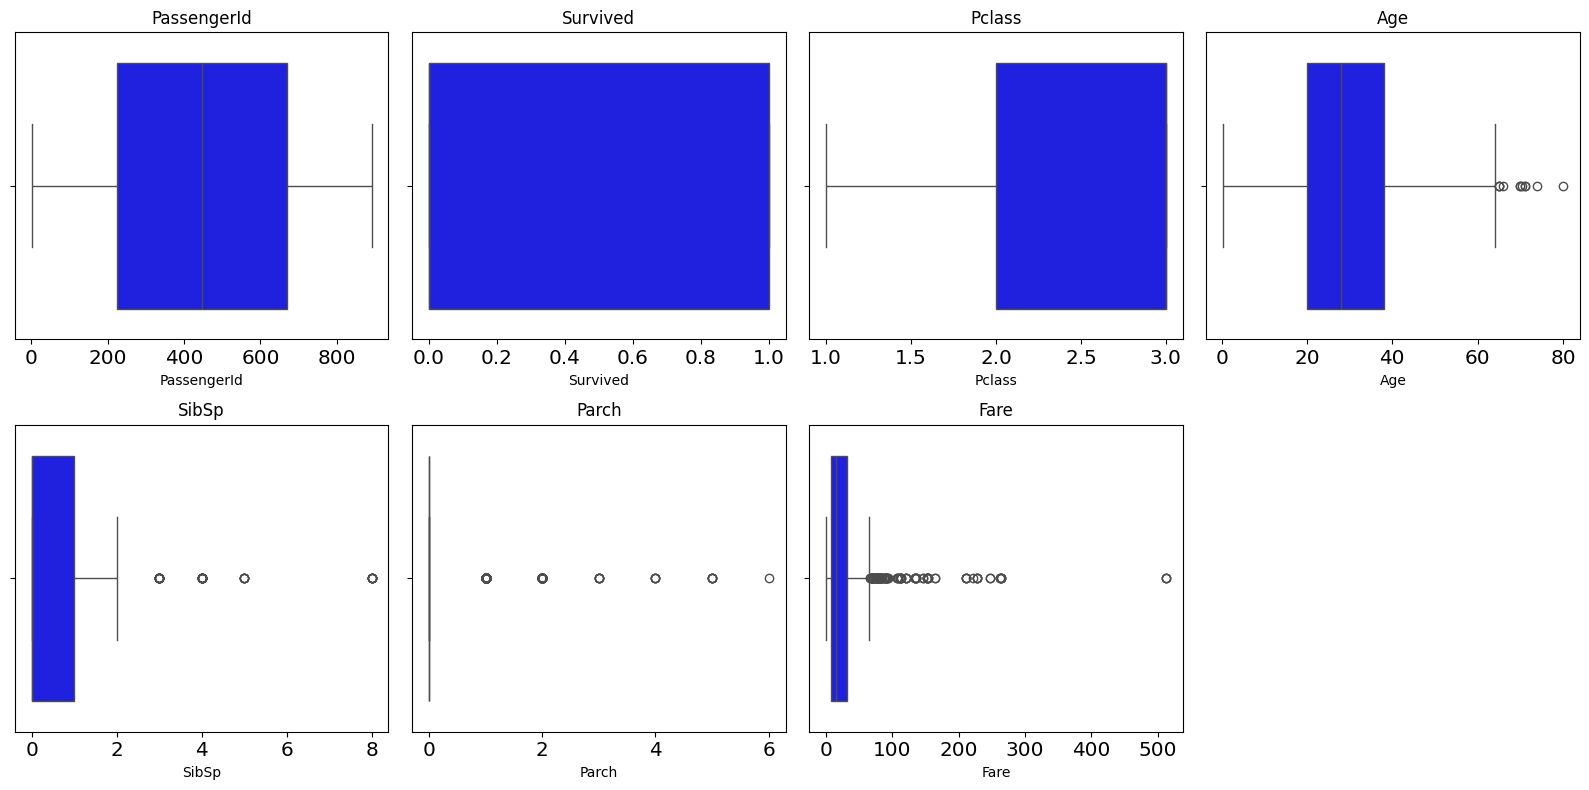

In [15]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data1[col], color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()

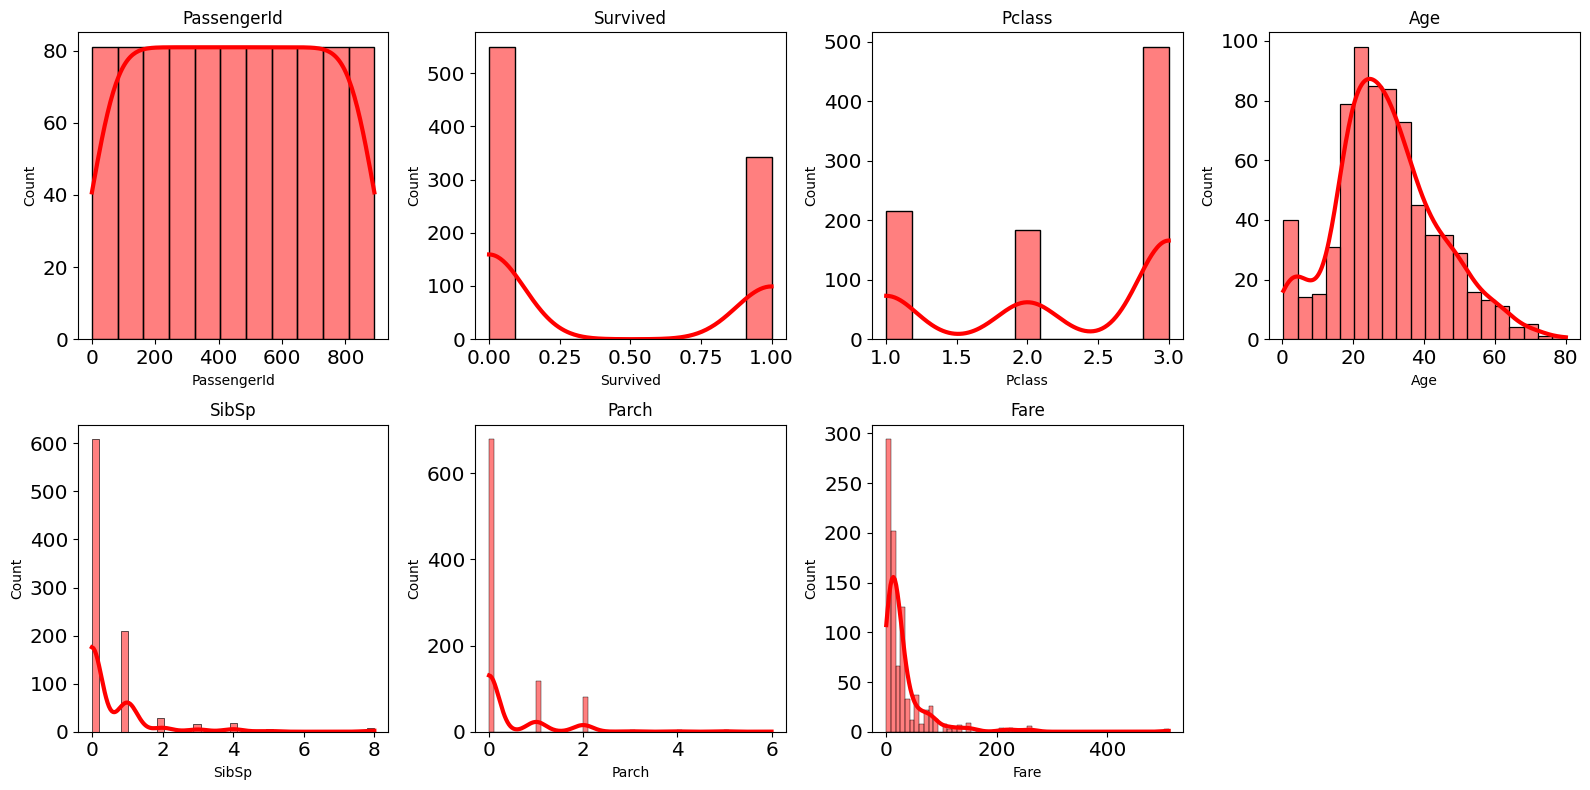

In [16]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=data1, x=col, kde=True, color="red")
    plt.title(col)

plt.tight_layout()
plt.show()

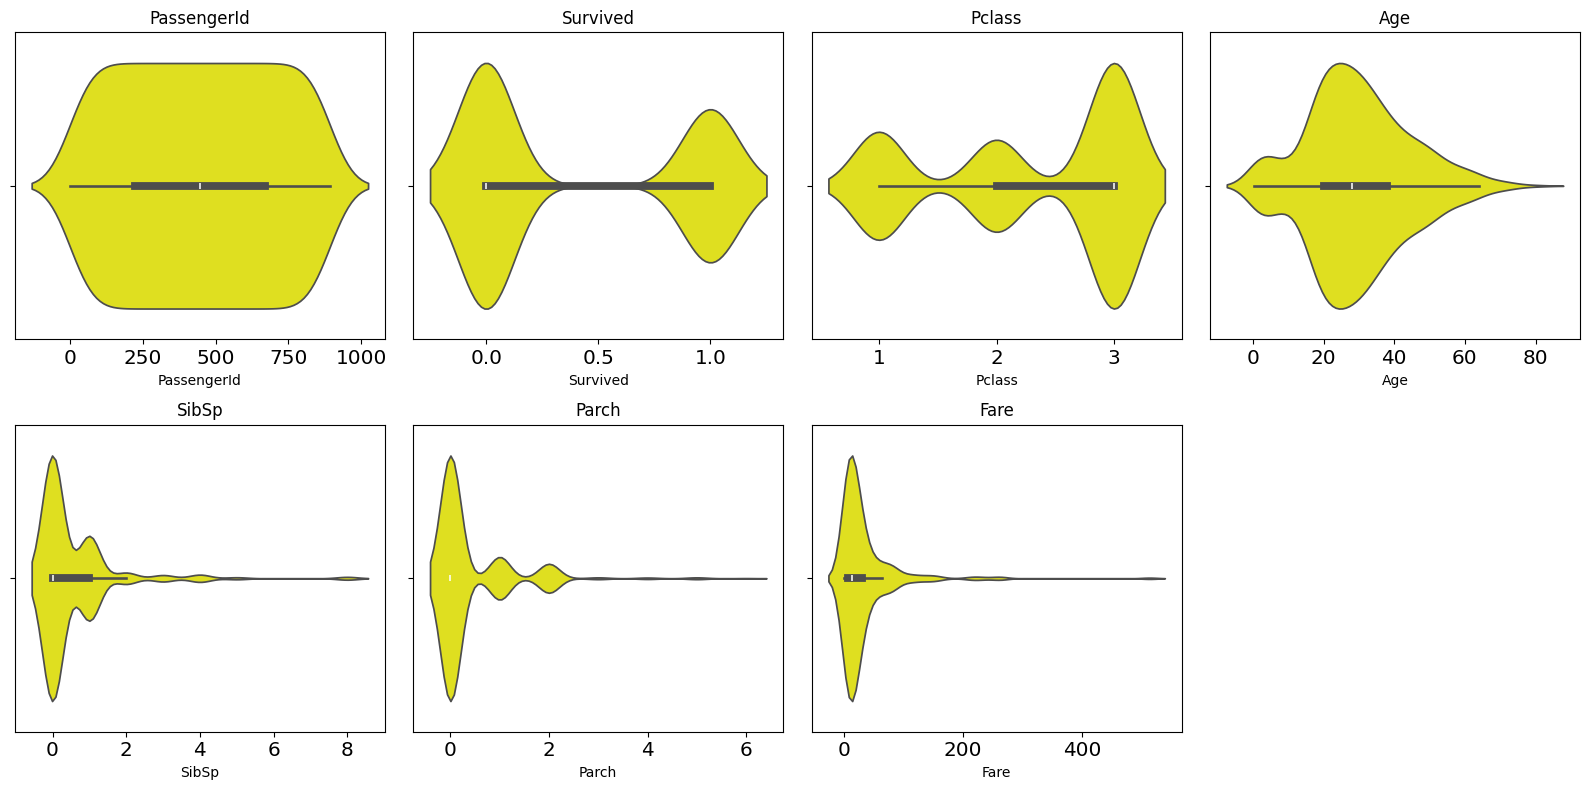

In [17]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x=data1[col], color="yellow")
    plt.title(col)

plt.tight_layout()
plt.show()

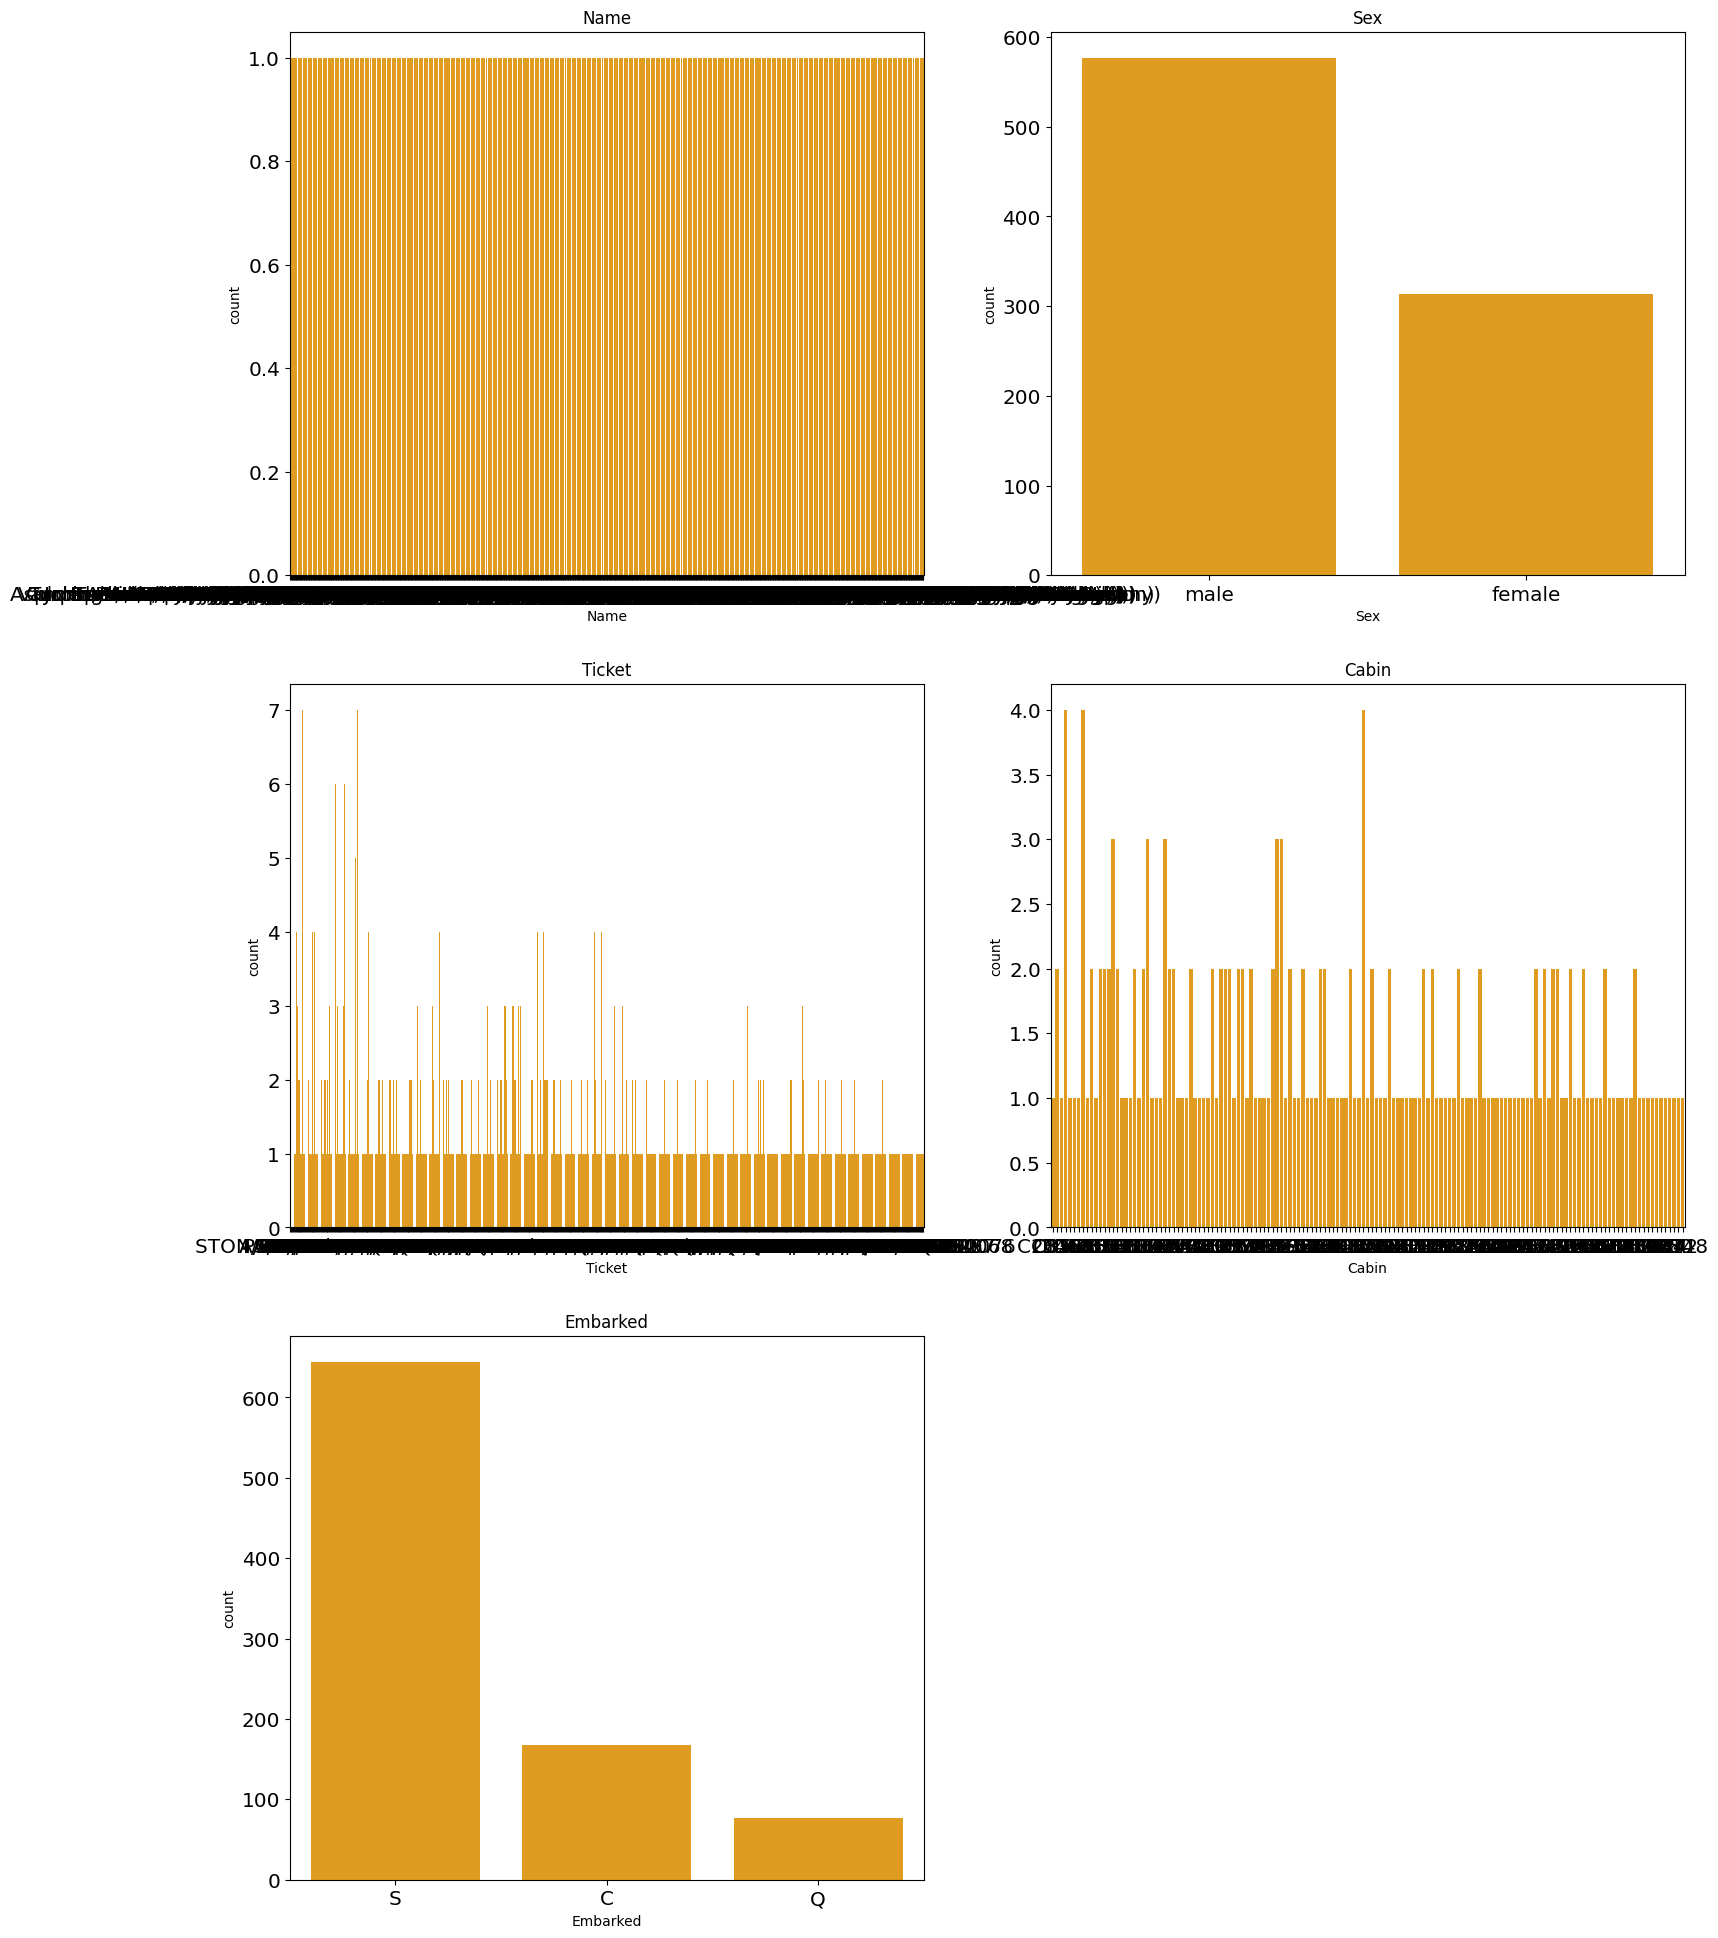

In [18]:
plt.figure(figsize=(18, 24))
n_cols = 2
n_rows = math.ceil(len(cat) / n_cols)

for i, col in enumerate(cat):
    plt.subplot(n_rows, n_cols, i + 1)
    
    sns.countplot(
        data=data1,
        x=col,
        color="orange"
    )
    
    plt.title(col)
    # plt.xticks(rotation=45)

# plt.tight_layout()
plt.show()

In [19]:
data2 = data1.drop(columns=['PassengerId'])
data2.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
print(data2.duplicated().sum())

0


In [21]:
pd.set_option("display.float_format", "{:.4f}".format)

skew_df = (
    data2.select_dtypes(include="number")
        .skew()
        .to_frame(name="Skewness")
        .sort_values("Skewness")
)

skew_df

,Skewness
Pclass,-0.6305
Age,0.3891
Survived,0.4785
Parch,2.7491
SibSp,3.6954
Fare,4.7873


In [22]:
data2.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q


## Bivariate Analysis

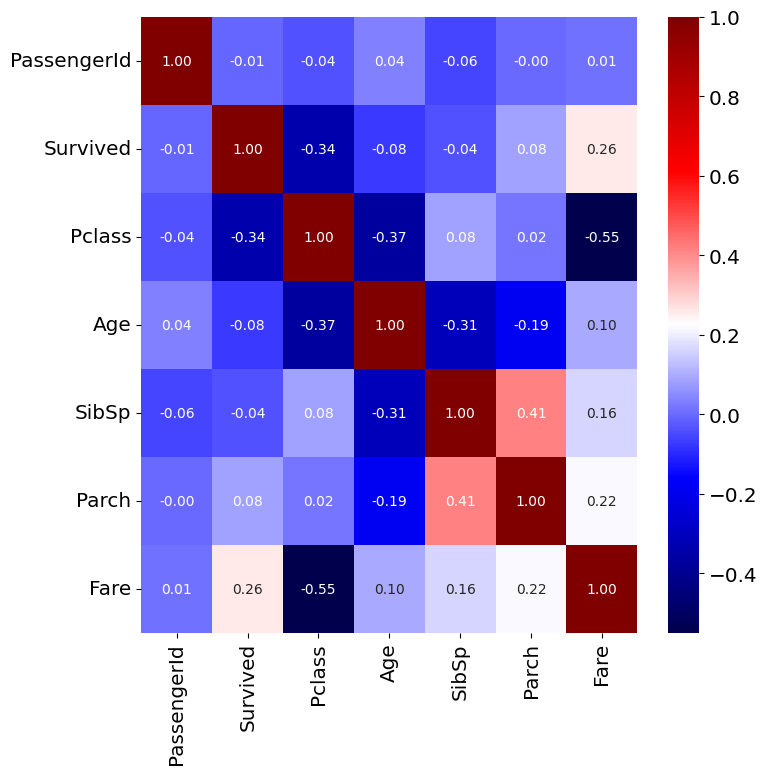

In [23]:
plt.figure(figsize=(8, 8))
corr_matrix = data1.select_dtypes(include="number").corr()

sns.heatmap(
    corr_matrix,
    cmap="seismic",
    annot=True,
    fmt=".2f"
)

plt.show()

<Figure size 1000x1000 with 0 Axes>

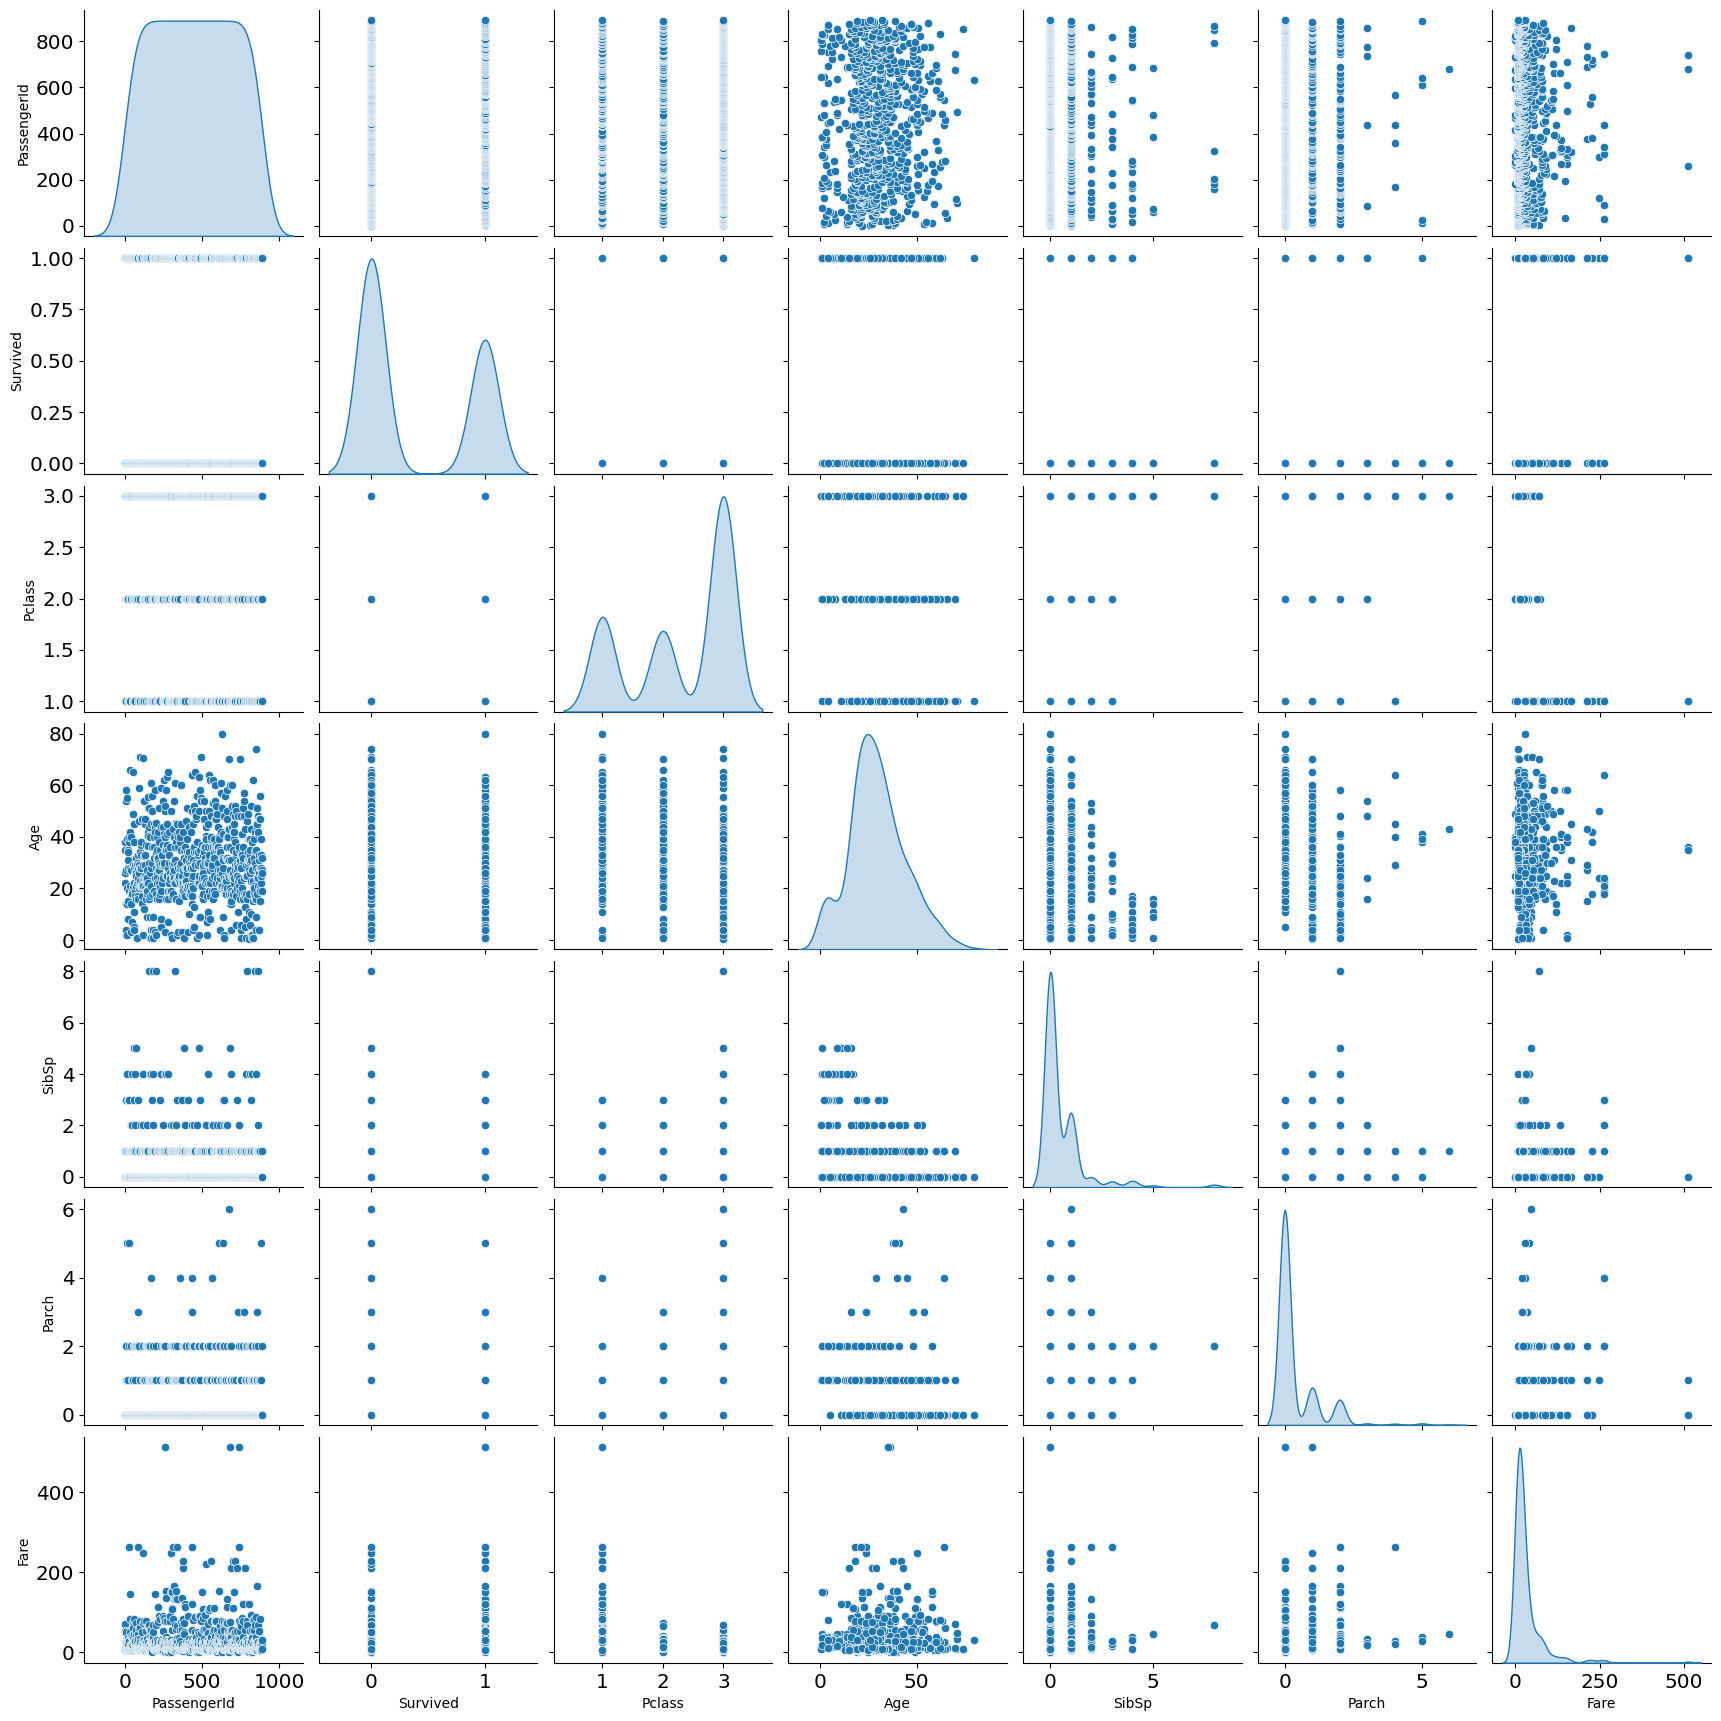

In [24]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data1,
    diag_kind="kde"
)
plt.show()

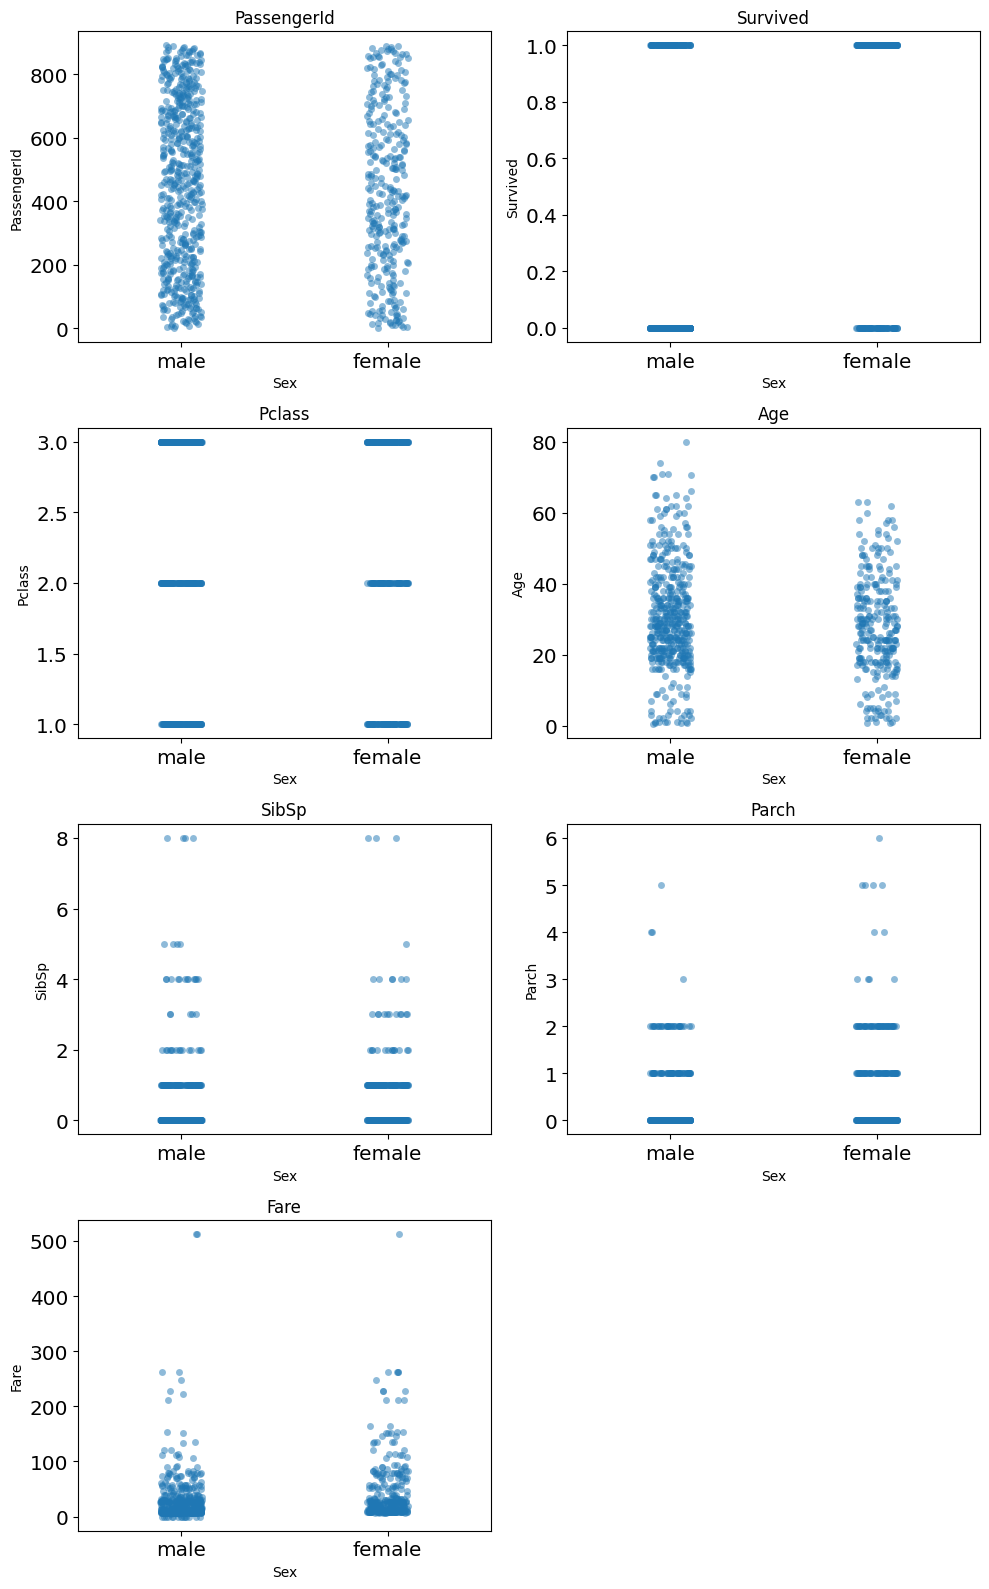

In [25]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Sex",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

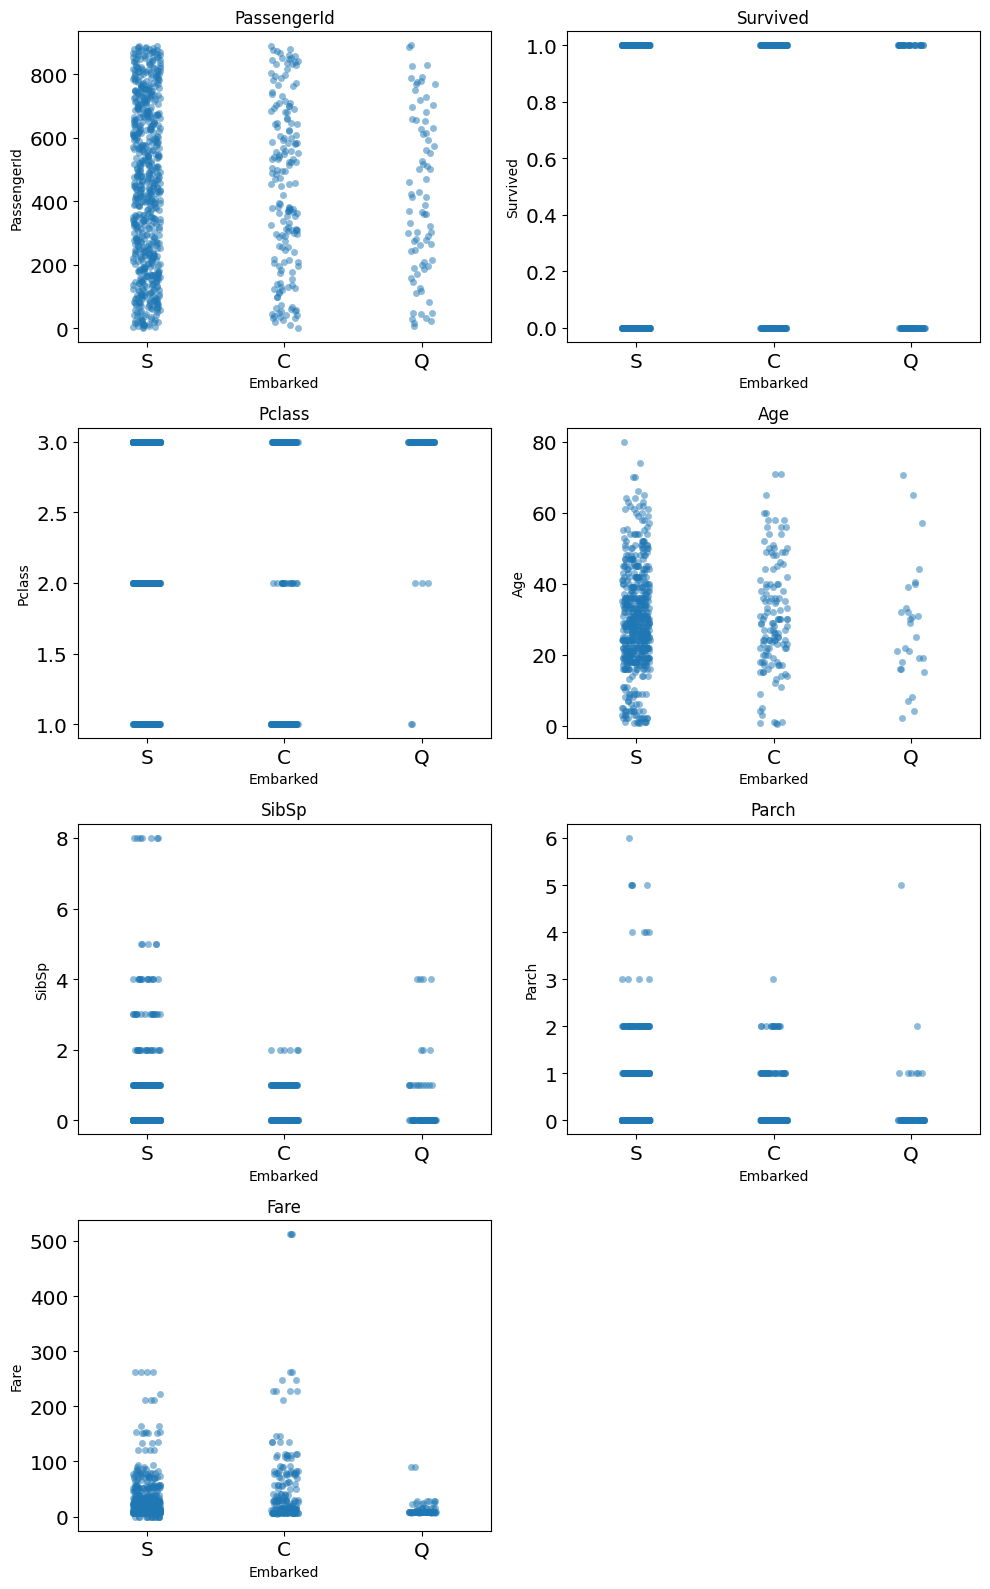

In [26]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Embarked",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

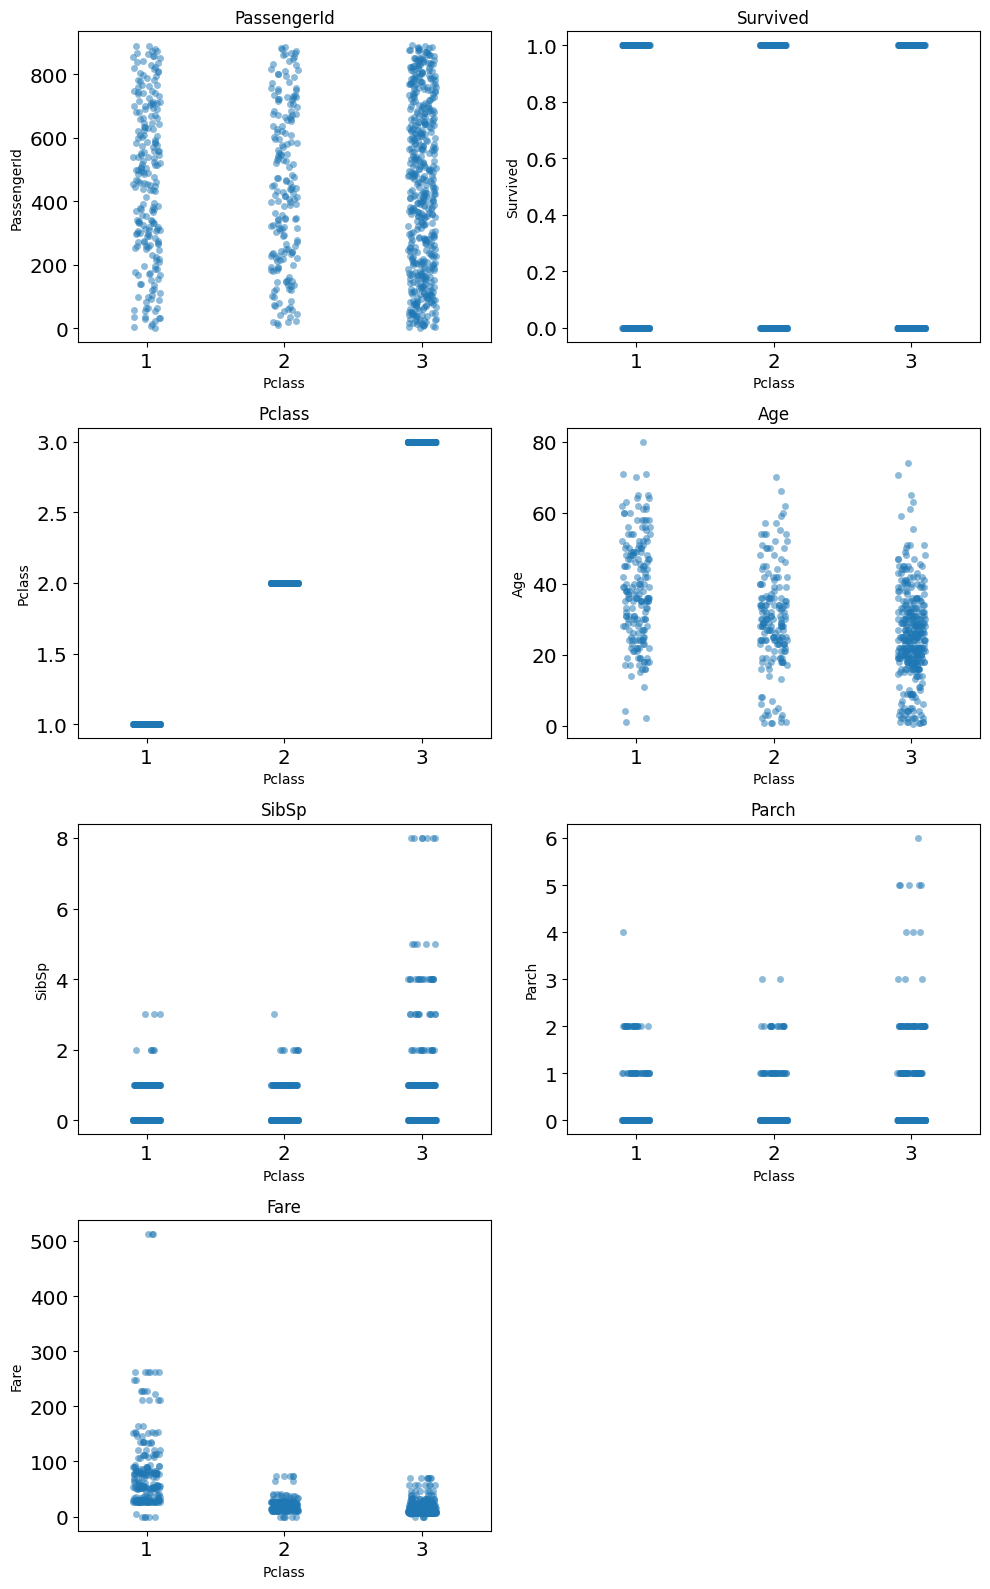

In [27]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Pclass",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

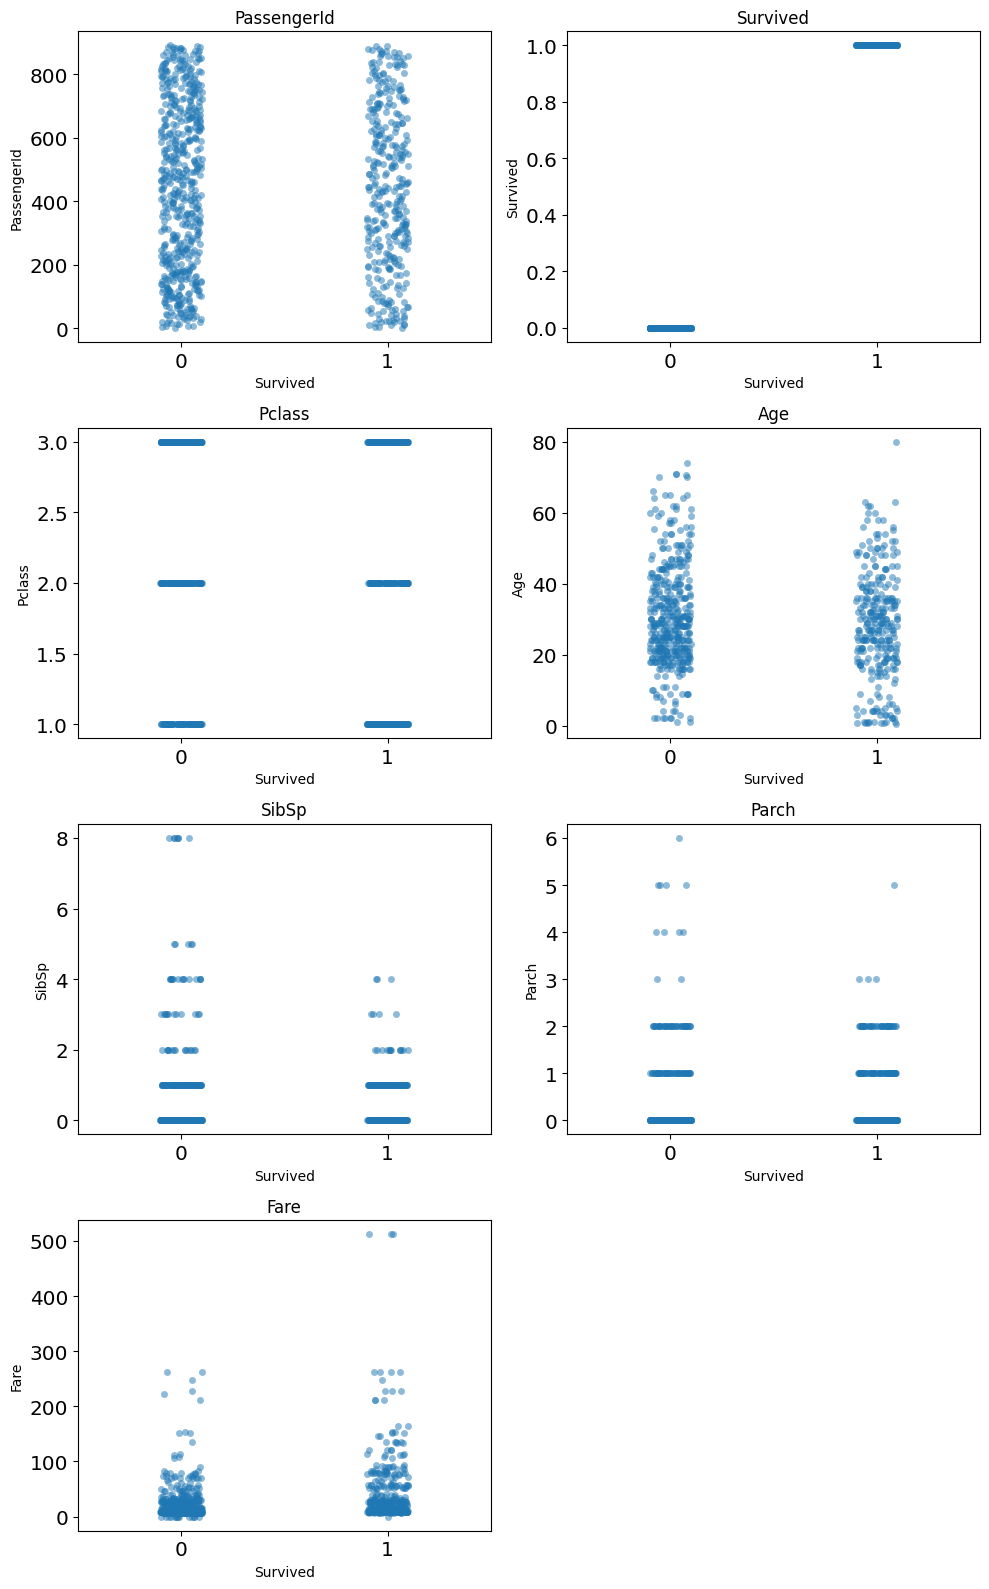

In [28]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Survived",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
print(data2.duplicated().sum())

0


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Text(0.5, 1.0, 'survived proportion (%)')

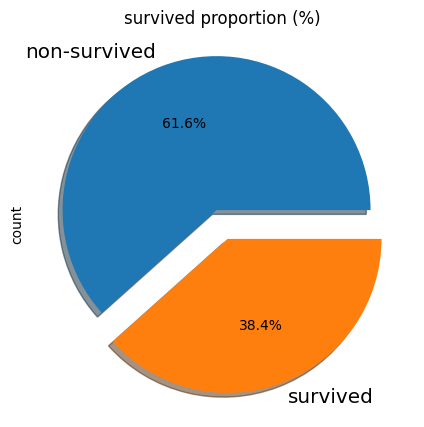

In [31]:
labels = 'non-survived','survived'
data2['Survived'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("survived proportion (%)")

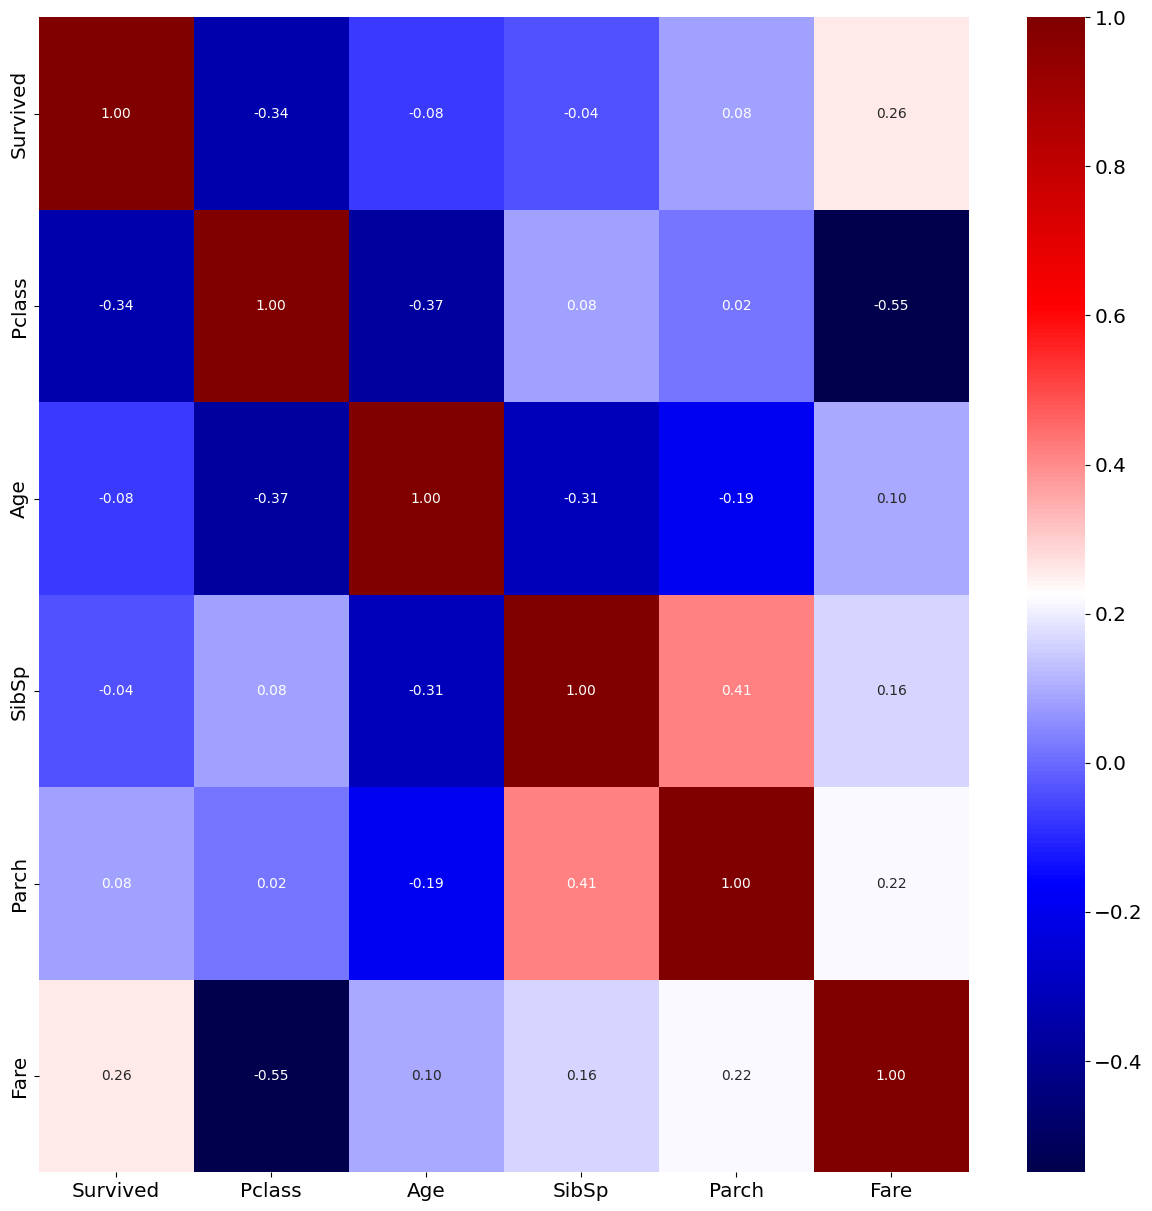

In [32]:
plt.figure(figsize=(15, 15))
corr_matrix = data2.select_dtypes(include=["number", "bool"]).corr()

sns.heatmap(
    corr_matrix,
    cmap="seismic",
    annot=True,
    fmt=".2f"
)

plt.show()

In [33]:
data2['Survived'].value_counts(normalize=True)

Survived
0   0.6162
1   0.3838
Name: proportion, dtype: float64

## Machine Learning Training

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class TitanicFE(BaseEstimator, TransformerMixin):
    def _add_basic_features(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()

        # Title
        X["Title"] = X["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
        rare_titles = ["Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"]
        X["Title"] = X["Title"].replace(rare_titles, "Rare")
        X["Title"] = X["Title"].replace({"Mlle":"Miss","Ms":"Miss","Mme":"Mrs"}).fillna("Unknown")

        # Family
        X["FamilySize"] = X["SibSp"].fillna(0) + X["Parch"].fillna(0) + 1
        X["IsAlone"] = (X["FamilySize"] == 1).astype(int)
        X["FamilySizeGroup"] = pd.cut(
            X["FamilySize"],
            bins=[0, 1, 4, 10],
            labels=["Alone", "Small", "Large"]
        )

        # Fare
        X["FarePerPerson"] = X["Fare"] / X["FamilySize"]
        X["FareLog"] = np.log1p(X["Fare"])

        # Cabin
        cabin_str = X["Cabin"].astype(str)
        X["CabinDeck"] = cabin_str.str[0].replace({"n": np.nan})
        X["HasCabin"] = X["Cabin"].notna().astype(int)
        X["NameLength"] = X["Name"].astype(str).str.len()

        X["Sex_Pclass"] = X["Sex"].astype(str) + "_" + X["Pclass"].astype(str)
        X["Embarked_Pclass"] = X["Embarked"].fillna("Unknown").astype(str) + "_" + X["Pclass"].astype(str)
        X["FareBin"] = pd.qcut(X["Fare"], 4, duplicates="drop")
        X["TicketPrefix"] = (
        X["Ticket"].astype(str)
            .str.replace(r"\d+", "", regex=True)
            .str.replace(r"[./]", " ", regex=True)
            .str.strip()
            .replace("", "None")
        )

        return X

    def fit(self, X, y=None):
        Xb = self._add_basic_features(X)

        self.global_age_ = Xb["Age"].median()
        self.age_med_ = Xb.groupby(["Title", "Pclass"])["Age"].median()
        self.ticket_counts_ = Xb["Ticket"].value_counts()

        return self

    def transform(self, X):
        Xb = self._add_basic_features(X)
        Xb["TicketGroupSize"] = Xb["Ticket"].map(self.ticket_counts_).fillna(1).astype(int)

        def fill_age(r):
            if pd.notna(r["Age"]):
                return r["Age"]
            key = (r["Title"], r["Pclass"])
            if key in self.age_med_.index and pd.notna(self.age_med_.loc[key]):
                return self.age_med_.loc[key]
            return self.global_age_

        Xb["Age"] = Xb.apply(fill_age, axis=1)
        return Xb


In [36]:
num_cols = ["Age","SibSp","Parch","Fare","FareLog","FamilySize","FarePerPerson","TicketGroupSize","HasCabin","NameLength"]
cat_cols = ["Pclass","Sex","Embarked","Title","IsAlone","CabinDeck","FamilySizeGroup","Sex_Pclass","FareBin","Embarked_Pclass","TicketPrefix"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

In [37]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

y = train_df["Survived"].astype(int)
X = train_df.drop(columns=["Survived"]).copy()
X_test = test_df.copy()

print(X.shape, X_test.shape)

(891, 11) (418, 11)


In [38]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
models = {
    "logreg": LogisticRegression(max_iter=2000),
    "rf": RandomForestClassifier(n_estimators=200, random_state=42),
    "gb": GradientBoostingClassifier(),
    "svc": SVC(probability=True)
}

In [40]:
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    pipe = Pipeline([
        ("fe", TitanicFE()),
        ("prep", preprocess),
        ("model", model)
    ])
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring)
    results.append({
        "model": name,
        "acc_mean": scores["test_accuracy"].mean(),
        "acc_std":  scores["test_accuracy"].std(),
        "f1_mean":  scores["test_f1"].mean(),
        "f1_std":   scores["test_f1"].std(),
        "auc_mean": scores["test_roc_auc"].mean(),
        "auc_std":  scores["test_roc_auc"].std(),
    })

df = pd.DataFrame(results).sort_values("auc_mean", ascending=False)
print(df)

    model  acc_mean  acc_std  f1_mean  f1_std  auc_mean  auc_std
2      gb    0.8217   0.0323   0.7598  0.0446    0.8937   0.0242
1      rf    0.8329   0.0135   0.7694  0.0206    0.8878   0.0301
3     svc    0.8202   0.0313   0.7525  0.0446    0.8869   0.0240
0  logreg    0.8259   0.0178   0.7619  0.0181    0.8805   0.0239


In [42]:
best_model_name = df.iloc[0]["model"]
best_model = models[best_model_name]
print(best_model)

GradientBoostingClassifier()


In [43]:
pipe = Pipeline([
    ("fe", TitanicFE()),
    ("prep", preprocess),
    ("model", best_model)
])

param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 3, 5, 7, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

search = RandomizedSearchCV(
    pipe,
    param_dist,
    n_iter=20,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_pipe = search.best_estimator_
print(best_pipe)

Pipeline(steps=[('fe', TitanicFE()),
                ('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare', 'FareLog',
                                                   'FamilySize',
                                                   'FarePerPerson',
                                                   'TicketGroupSize',
                                                   'HasCabin', 'NameLength']),
                                                 ('cat',
                                                  P

In [44]:
val_pred = best_pipe.predict(X_val)

print("HOLDOUT Accuracy:", accuracy_score(y_val, val_pred))
print("HOLDOUT F1:", f1_score(y_val, val_pred))

HOLDOUT Accuracy: 0.8044692737430168
HOLDOUT F1: 0.7445255474452555


In [45]:
if hasattr(best_pipe.named_steps["model"], "predict_proba"):
    val_proba = best_pipe.predict_proba(X_val)[:, 1]
    print("HOLDOUT ROC-AUC:", roc_auc_score(y_val, val_proba))

print(classification_report(y_val, val_pred))
print(confusion_matrix(y_val, val_pred))

HOLDOUT ROC-AUC: 0.8512516469038208
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 17]
 [18 51]]


In [46]:
tuned_rf = best_pipe.named_steps["model"]

gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, random_state=42)

In [47]:
ensemble_model = VotingClassifier(
    estimators=[
        ("rf", tuned_rf),
        ("gb", gb),
        ("lr", lr),
    ],
    voting="soft"
)

ensemble_pipe = Pipeline([
    ("fe", TitanicFE()),
    ("prep", preprocess),
    ("model", ensemble_model)
])

In [48]:
ensemble_pipe.fit(X_train, y_train)
val_pred_ens = ensemble_pipe.predict(X_val)

print("ENSEMBLE HOLDOUT Accuracy:", accuracy_score(y_val, val_pred_ens))
print("ENSEMBLE HOLDOUT F1:", f1_score(y_val, val_pred_ens))

if hasattr(ensemble_pipe.named_steps["model"], "predict_proba"):
    val_proba_ens = ensemble_pipe.predict_proba(X_val)[:, 1]
    print("ENSEMBLE HOLDOUT ROC-AUC:", roc_auc_score(y_val, val_proba_ens))

ENSEMBLE HOLDOUT Accuracy: 0.8268156424581006
ENSEMBLE HOLDOUT F1: 0.7703703703703704
ENSEMBLE HOLDOUT ROC-AUC: 0.8661396574440053


## Inference 

In [49]:
ensemble_pipe.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('fe', ...), ('prep', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains

In [50]:
test_pred = ensemble_pipe.predict(X_test)

In [51]:
joblib.dump(ensemble_pipe, "titanic_model.joblib")

['titanic_model.joblib']

In [52]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_pred.astype(int)
})
submission.to_csv("submission.csv", index=False)

print("Saved: submission.csv + titanic_model.joblib")

Saved: submission.csv + titanic_model.joblib
